## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#reading ab_data file to dataframe
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
#check for missing values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
#to know the number of users converted and not converted
df['converted'].value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [7]:
#ratio of users converted to all users
df.query("converted == 1").shape[0]/df.shape[0]

0.11965919355605512

e. The number of times when the "group" is treatment but "landing_page" is not a new_page.

In [13]:
#grooupby on landing page and group done for result validation
df.groupby(['group','landing_page'])['group'].count()

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
Name: group, dtype: int64

In [14]:
#df.shape[0]-df.query("landing_page == 'new_page' and group == 'treatment'").shape[0]
sum((df.landing_page != 'new_page') & (df.group == 'treatment'))+sum((df.landing_page != 'old_page') & (df.group == 'control'))

3893

In order to calculate the the number of times new_page and treatment don't lineup, we subtract the number of times they line up from the total number of records in the dataset.

f. Do any of the rows have missing values?

In [15]:
#df.isnull().sum()
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

No rows are missing any values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [16]:
#dataframes are concatenated to create df2
df2 = pd.concat([df.query("landing_page == 'new_page' and group == 'treatment'"), df.query("landing_page == 'old_page' and group == 'control'")])
#capturing the number of records in df2 for validation of results in the next steps
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [17]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [18]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [19]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [20]:
#https://sparkbyexamples.com/pandas/pandas-get-list-of-all-duplicate-rows/?expand_article=1
#https://www.machinelearningplus.com/pandas/pandas-duplicated/
#user_id_repeat = df2[df2[['user_id']].duplicated(keep=False) == True]
#above codes both shows both the occurences as duplicate 
user_id_repeat = df2[df2[['user_id']].duplicated(keep=False) == True]

Duplicate user_id is captured in user_id_repeat

c. What is the row information for the repeat **user_id**? 

In [21]:
user_id_repeat

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [22]:
#number of records in dataframe prior to removing duplicate
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [23]:
#https://sparkbyexamples.com/pandas/pandas-drop-duplicate-rows-from-dataframe/#:~:text=Remove%20All%20Duplicate%20Rows%20from,drop_duplicates(keep%3DFalse)%20.
#below code keeps the first occurence of duplicare user_id, while deleting the second instance
df2.drop_duplicates(subset=["user_id"],keep='first', inplace = True)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 2 to 294476
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


To confirm the duplicate user_id is deleted, we captured the total records prior to deletion and after deletion. 

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [25]:
df2['converted'].mean()

0.11959708724499628

Mean of the entire population is calculated for captring the probability of converting regardless of the page received

In [26]:
#probability of converting captured based on landing page for future validation
df2.groupby('landing_page')['converted'].mean()

landing_page
new_page    0.118808
old_page    0.120386
Name: converted, dtype: float64

b. Given that an individual was in the `control` group, what is the probability they converted?

In [27]:

df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [28]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [29]:
df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**
There is not signinficant difference in the conversion probability. Initial analysis/evidence suggests that new treatment page may not lead to more conversions

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
Null hypothesis: Old page has better conversion

**$p_{old}$** - **$p_{new}$** >=0 


Alternate hypothesis: New page has better conversion

**$p_{old}$** - **$p_{new}$** < 0


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

Null hypthosesis is $p_{new}$ - $p_{old}$ = 0 as the conversion rates are same regardless of page received.
Under this assumption regardless of page, the converted rate is same as that of the population.This should be the mean of the complete dataset.

In [30]:
p = df2['converted'].mean()
#p is conversion rate of the entire dataset (population)
p

0.11959708724499628

Converison rate of the population is calcualted as under the null hypothesis, the conversion success rate is same regarless of page received.

In [31]:
#Below code is only written for validation on results in next steps
df2.groupby(['landing_page'])['landing_page'].count()

landing_page
new_page    145310
old_page    145274
Name: landing_page, dtype: int64

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [32]:
df2['converted'].mean()

0.11959708724499628

$p_{old}$ is same as conversion rate of the population based on the null hypothesis <br><br>

c. What is $n_{new}$?

In [33]:
n_new = df2.query("landing_page == 'new_page'")['landing_page'].count()

In [34]:
n_new

145310

$n_{new}$ is total records with new_page in the dataset

d. What is $n_{old}$?

In [35]:
n_old = df2.query("landing_page == 'old_page'")['landing_page'].count()

In [36]:
n_old

145274

$n_{old}$ is total records with old_page in the dataset

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [38]:
#https://www.projectpro.io/recipes/list-unique-values-in-pandas-dataframe
#list is sorted to have random sample in descending order for the next step
random_sample = sorted(pd.unique(df['converted']),reverse = True)

random_sample

[1, 0]

In [42]:
#from sampling distributions lecture
#https://pynative.com/python-random-choice/
#random choice from 1D array with size of nnew 
#https://www.geeksforgeeks.org/how-to-get-weighted-random-choice-in-python/
#The list in new_page_converted should only be 1 and 0. We are therefore passing a list of 1,0 along with their probabilities which is population mean for '1' and 1-mean for '0'
new_page_converted = np.random.choice(random_sample,size = n_new ,p =[p,1-p])


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [43]:
#since in our null hypothesis the Pnew = Pold, we are therefore using the same probability for simulating transactions
old_page_converted = np.random.choice(random_sample,size = n_old ,p =[p,1-p])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [47]:
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()

In [48]:
p_new - p_old

-0.0003669193864552778

$p_{new}$ and $p_{old}$ from simulated values are the mean of new_page_converted and old_page_converted

In [49]:
#for analysis purposes in the future steps
len(old_page_converted), len(new_page_converted)

(145274, 145310)

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [50]:
#based on feedback from reviewer as this calculates much faster than for loops 
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new 
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old 
p_diffs = new_converted_simulation - old_converted_simulation

In [141]:
#https://www.humaneer.org/blog/create-weighted-samples-using-pandas-dataframe/
#Sampling distributions lecture
#Simulating from null lecture

p_diffs = []

for _ in range(10000):
    sample_p_new = np.random.choice(random_sample,size = n_new , p =[p, 1-p])
    sample_p_old = np.random.choice(random_sample,size = n_old , p =[p, 1-p])    
 
    p_diffs.append(sample_p_new.mean() - sample_p_old.mean())   
    




In [51]:
#for verification purpose
len(p_diffs)

10000

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

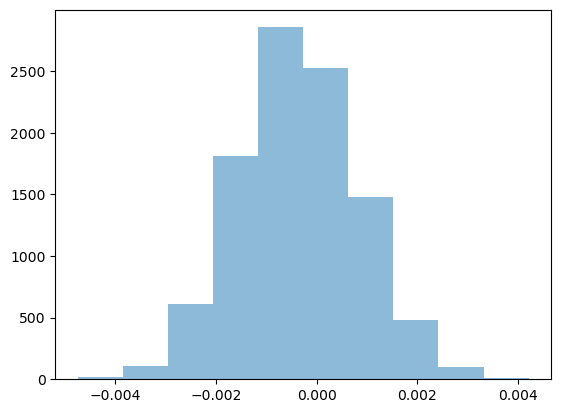

In [52]:
plt.hist(p_diffs, alpha = 0.5);

The histogram is as expected suggesting the null hypothesis is true

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [53]:
#p_diffs= np.array(p_diffs)
#p_diffs.mean()
p_old_mean = df2.query("landing_page == 'old_page'")['converted'].mean()
p_new_mean = df2.query("landing_page == 'new_page'")['converted'].mean()

act_diff = p_new_mean - p_old_mean

#https://www.educba.com/numpy-for-loop/

p_diffs_gt_actdiff = 0
for x in p_diffs:
    if(x> act_diff):
       p_diffs_gt_actdiff = p_diffs_gt_actdiff +1


print(p_diffs_gt_actdiff)

p_diffs_gt_actdiff/len(p_diffs)

8434


0.8434

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

The proportion is called p-value.The larger p-value here suggests that we should stay with null hypothesis.There is not much difference between new and old pages

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [55]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

convert_old,convert_new,n_old,n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [56]:
#https://knowledge.udacity.com/questions/32882
z_score, p_value = sm.stats.proportions_ztest(
    [convert_new, convert_old], 
    [n_new, n_old], 
    alternative='larger') 
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

Small z value indicates the statistic is closer to the mean of the dataset. This implies the null hypothesis is true. Also a large p-value also indicates the null hypothesis is true

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

Logistic regression should be performed here as the predicted response variable will be limited to a probability between 0 and 1

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [57]:
#for analysis purposes only
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [58]:
#creating dummy variables for landing page
df2[['new','old']] = pd.get_dummies(df2['landing_page'])


In [59]:
#check if old_pages are showing up under column old
df2.query("landing_page == 'old_page'").head()

,user_id,timestamp,group,landing_page,converted,new,old
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,0,1


In [60]:
#check if new_pages are showing up under column new
df2.query("landing_page == 'new_page'").head()

,user_id,timestamp,group,landing_page,converted,new,old
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0


In [61]:
#creating dummy variables for group
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,new,old,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


In [62]:
#code to check when group is control ab_page is set to 0
df2.query("group == 'control'").head()

,user_id,timestamp,group,landing_page,converted,new,old,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,0,1,0


In [63]:
#code to check when group is treatment ab_page is set to 1
df2.query("group == 'treatment'").head()

,user_id,timestamp,group,landing_page,converted,new,old,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


In [64]:
df2['intercept']=1

In [65]:
#for verification purpose
df2.head()

,user_id,timestamp,group,landing_page,converted,new,old,ab_page,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [66]:
#logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page','new']])
#https://knowledge.udacity.com/questions/869842
#new has been removed due to multicollinearity between ab_page and new
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Jul 2023   Pseudo R-squ.:               8.077e-06
Time:                        23:03:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

Removed the 'new' column after getting the LinAlgError: Singular matrix, which suggests there is high correlation between ab_page and new. The high p-value suggests we should stick with null hypothesis. The negative coefficient on both ab_page (and new) suggests that there is a negative relationship between the variabe (new) and outcome (converted). The small coefficient on ab_page all suggest there is no relationship between explanatory variable and outcome.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

The p-value in logistic regression is 0.190. The null hypothesis in regression model is that explanatory variable has no impact on outcome, while the alternative hypothesis is the explanatory variable has impact on outcome.

The null hypothesis in z-test is no statistical difference between population mean and sample mean.

The other main reason p-values are different is because of type of test. From the formulated hypothesis, in part II we had one-tailed test where as in part III it is two tailed test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

There are no additional features in the current dataset that might influence whether an individual converts or not. There may be other intangible factors that could influence whether or not an individual converts, but there is no certainty that they would have statistical significance. Also, there is a possibility of multi-collinearity between features, which needed to be taken into account.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [67]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [68]:
# for verification purposes only
df_new.head()

,country,timestamp,group,landing_page,converted,new,old,ab_page,intercept
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,1


In [69]:
#for visualization of values in the country column
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [70]:
# Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])

In [167]:
# to check if US is set to 1 when country = US
df_new.query("country == 'US'").head()

,country,timestamp,group,landing_page,converted,new,old,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,,,
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1,0,0,1
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,0,1,1,0,0,1
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,0,1,1,0,0,1
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,0,1,1,0,0,1
820683,US,2017-01-14 11:52:06.521342,treatment,new_page,0,1,0,1,1,0,0,1


In [71]:
logit2_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'US','CA']])
results2 = logit2_mod.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Jul 2023   Pseudo R-squ.:               1.521e-05
Time:                        23:09:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
==============================================================================
"""

The coefficients with country are too small to be significant to affect the outcome of whether an individual converts or not

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [73]:
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_CA'] = df_new['ab_page'] * df_new['CA']

In [74]:
### Fit Your Linear Model And Obtain the Results
logit3_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page' ,'UK','CA','ab_UK','ab_CA']])
results3 = logit3_mod.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 Jul 2023   Pseudo R-squ.:               3.482e-05
Time:                        23:14:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
ab_UK          0.0314      0.027      1.181      0.238      -0.021       0.084
ab_CA         -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

The p-values are still high. This suggests that there is no impact on outcome with the interaction between page and country.

<a id='conclusions'></a>
## Conclusions

From the above testing/analysis that was performed, we can conclude that there is no clear evidence that new page will lead to better conversions. The recommendation, therefore, is to keep the old page.

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

<a id='Resources'></a>
## Resources

https://sparkbyexamples.com/pandas/pandas-get-list-of-all-duplicate-rows/?expand_article=1

https://www.machinelearningplus.com/pandas/pandas-duplicated/

https://sparkbyexamples.com/pandas/pandas-drop-duplicate-rows-from-dataframe/#:~:text=Remove%20All%20Duplicate%20Rows%20from,drop_duplicates(keep%3DFalse)%20.

https://www.geeksforgeeks.org/how-to-get-weighted-random-choice-in-python/

https://pynative.com/python-random-choice/

https://www.projectpro.io/recipes/list-unique-values-in-pandas-dataframe

https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

https://www.educba.com/numpy-random-choice/

https://www.programiz.com/python-programming/methods/list/sort#:~:text=Sort%20in%20Descending%20order,list%20in%20the%20descending%20order.

https://www.educba.com/numpy-for-loop/

https://www.statology.org/can-a-z-score-be-negative/

https://knowledge.udacity.com/questions/869842